# Content

<a href=#imports>Import Libraries</a>

<a href=#fn>Functions</a>

<a href=#load>Load Data</a>

<a href=#EDA>Explratory Data Analysis (EDA)</a>

<a href=#cl>Classification</a>

  <ol>
  <li> Select Lable-Target</li>
    
  <li>Get dummies</li>
    
  <li>Splite model</li>
    
  <li>Handling with Class Imbalance</li>
    
  <li>Exp0( Logistic Regression),Exp1(Decision tree),
     Exp2(Random Forest),Exp3(KNN),Exp4(XGboost)</li>
    
  <li>Voting & Stacking</li>
    
  <li>Best threshold</li>
    
  <li>Confusion metrics</li>

</ol>


# <a name=imports> Import libraries</a>

In [1]:
# munging imports
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import linear_model, neighbors, ensemble
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, auc,recall_score, precision_recall_curve, fbeta_score, confusion_matrix, classification_report, make_scorer,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from mlxtend.classifier import StackingClassifier


from imblearn.under_sampling import RandomUnderSampler

import imblearn.over_sampling
from imblearn.over_sampling import RandomOverSampler


from imblearn.pipeline import Pipeline


# <a name=fn>Functions</a>

In [2]:
def model_eval(mdl_local, X_local, y_local, bta =1):
    y_pred = mdl_local.predict(X_local)
    
    print("Accurcy :", accuracy_score(y_local, y_pred))
    print(f"F({bta}):", fbeta_score(y_local, y_pred, beta= bta))
    print("Precision :", precision_score(y_local, y_pred))
    print("Recall :", recall_score(y_local, y_pred))

# <a name=load>Load data</a>

In [3]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


# <a name=EDA>Explratory data analysis(EDA)</a>

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


### 1. Null values


In [9]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
df.fillna(0, inplace = True)


In [11]:
df.isna().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### 2.Missing Values


In [12]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
gender - 0%
age - 0%
hypertension - 0%
heart_disease - 0%
ever_married - 0%
work_type - 0%
Residence_type - 0%
avg_glucose_level - 0%
bmi - 0%
smoking_status - 0%
stroke - 0%


### 3.Duplicate Values


In [13]:
sum(df.duplicated())

0

### 4.Drop column we dont need 


In [14]:
df.drop(columns=['id'],inplace=True)
df.drop(columns=['work_type'],inplace=True) 

### 5.Plots


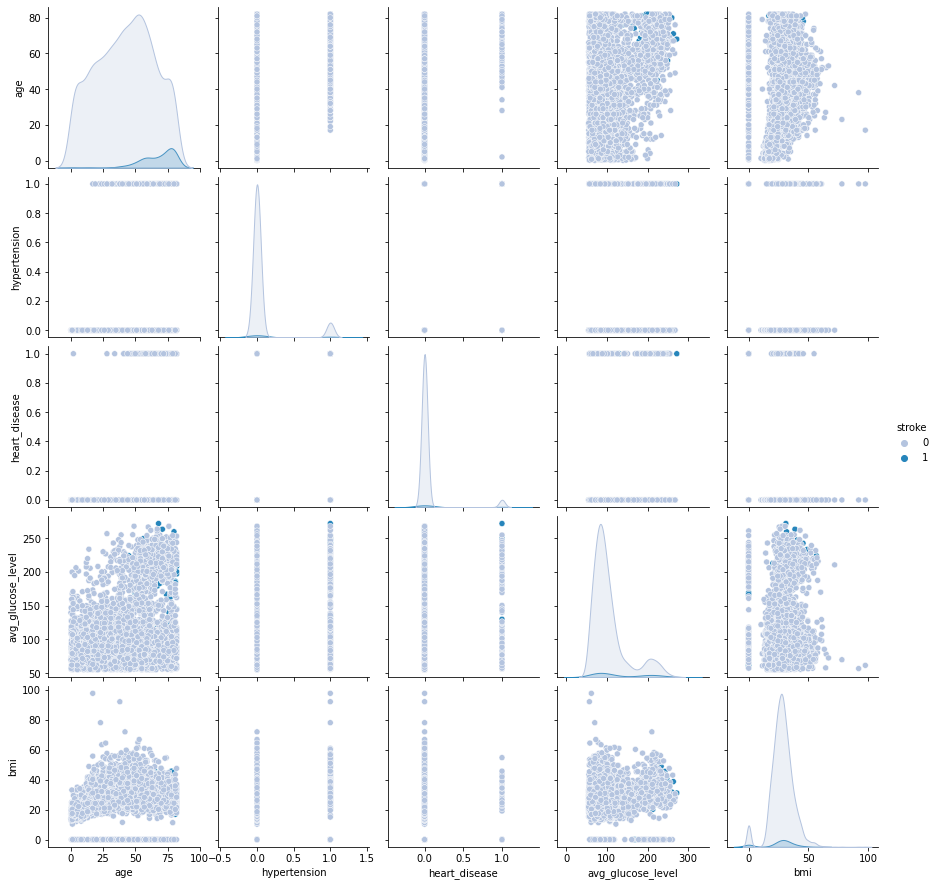

In [15]:
sns.pairplot(df, hue='stroke',palette ='PuBu');

<AxesSubplot:>

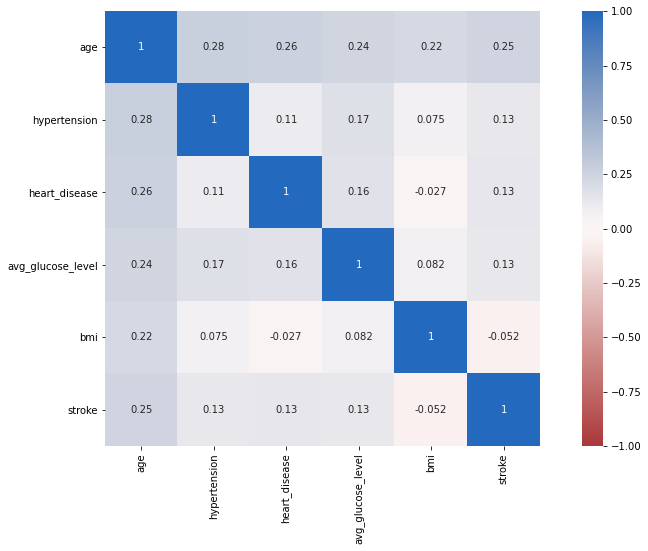

In [16]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),square=True, annot=True, vmin=-1, vmax=1,cmap='vlag_r')

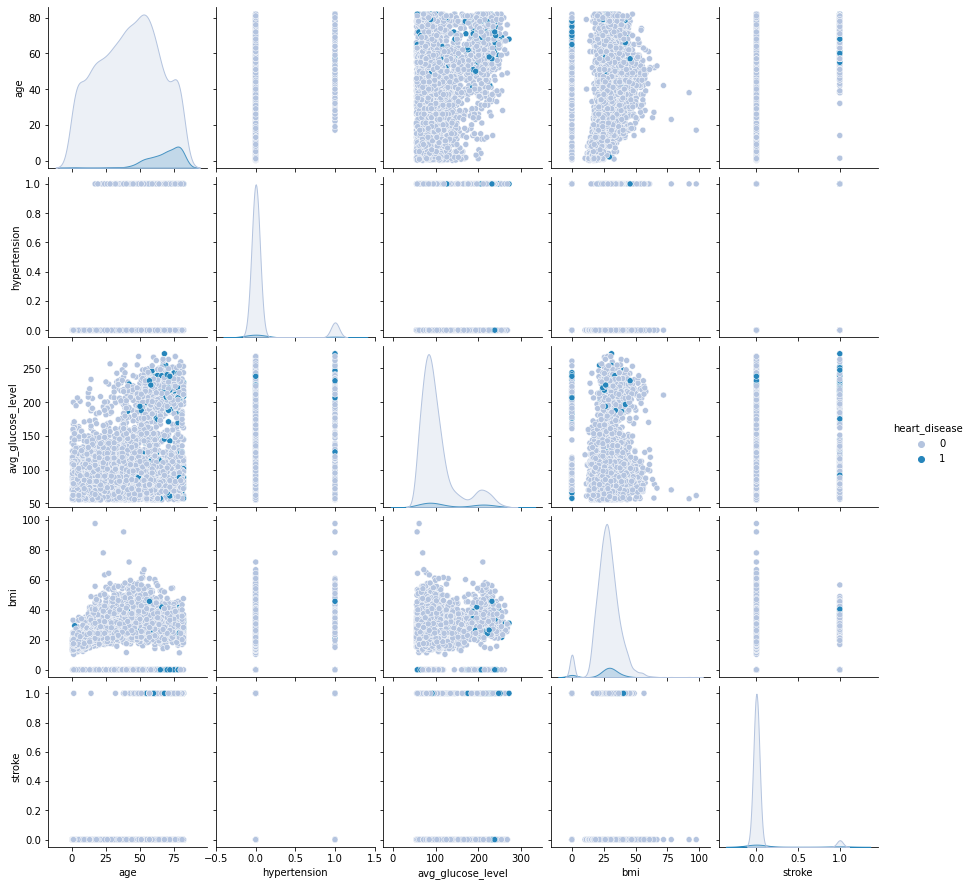

In [17]:
sns.pairplot(df, hue='heart_disease',palette ='PuBu');

Text(0.5, 1.0, 'Outlires')

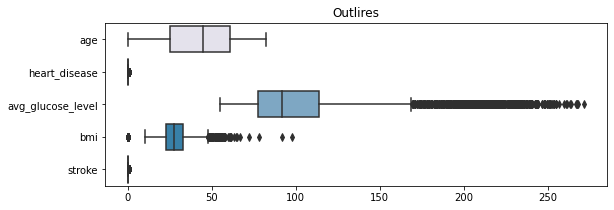

In [18]:
plt.figure(figsize=(9,3))
sns.boxplot(data=df[['age','heart_disease','avg_glucose_level','bmi','stroke']], orient='h',palette ='PuBu')
plt.title("Outlires")

### which gender is get stroke most?


In [19]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [20]:
indexNames = df[ df['gender'] == 'Other' ].index
df.drop(indexNames , inplace=True)

Text(0.5, 1.0, 'which gender is get stroke most')

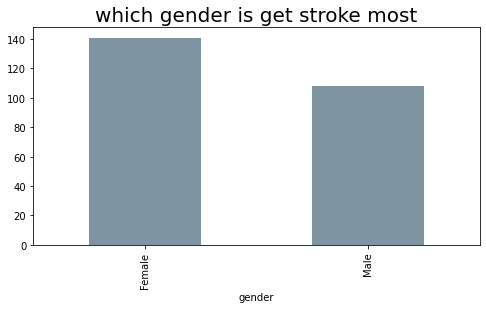

In [21]:
df.groupby('gender')['stroke'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(8,4),color=['#7F94A1'])
plt.title("which gender is get stroke most",fontsize=20,)

<AxesSubplot:ylabel='stroke'>

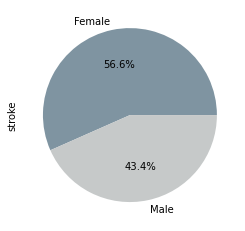

In [22]:
colors = ['#7F94A1','#C6C9C9']
df.groupby('gender')['stroke'].sum().sort_values(ascending=False).plot.pie(autopct='%1.1f%%',figsize=(8,4),colors=colors)

# <a name=fe>Featuer engenering</a>

### which age is most get stroke most?

In [23]:
df.loc[(df.age >= 1) & (df.age < 19),  'AgeGroup'] = 'Kid'
df.loc[(df.age >= 20) & (df.age < 49),  'AgeGroup'] = 'Adult'
df.loc[(df.age >= 50) & (df.age < 100),  'AgeGroup'] = 'Old'

In [24]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,AgeGroup
0,Male,67.0,0,1,Yes,Urban,228.69,36.6,formerly smoked,1,Old
1,Female,61.0,0,0,Yes,Rural,202.21,0.0,never smoked,1,Old
2,Male,80.0,0,1,Yes,Rural,105.92,32.5,never smoked,1,Old
3,Female,49.0,0,0,Yes,Urban,171.23,34.4,smokes,1,NaN
4,Female,79.0,1,0,Yes,Rural,174.12,24.0,never smoked,1,Old


<AxesSubplot:title={'center':'the most age group has stroke '}, ylabel='stroke'>

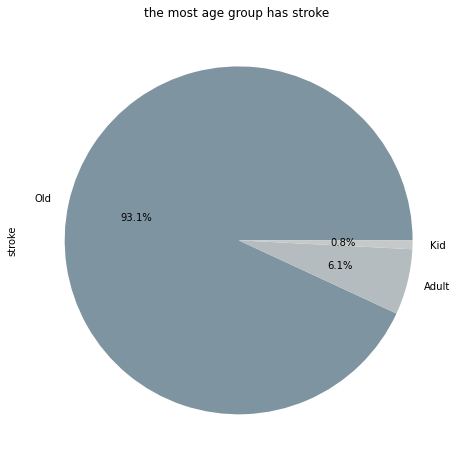

In [25]:
colors = ['#7F94A1','#B4BCBF','#C6C9C9']

AgeG=df.groupby('AgeGroup')['stroke'].sum().sort_values(ascending=False)

AgeG.plot.pie(title='the most age group has stroke ' ,colors=colors,autopct='%1.1f%%' ,figsize=(8,8))

# <a name=cl>Classification</a>

### Determine the Lable and target

In [26]:
x = df.drop(['stroke'],axis=1)
y = df.stroke

In [27]:
x.shape

(5109, 10)

In [28]:
y.shape

(5109,)

### Determine categorical and Numerical value


In [29]:
Num_list=x.select_dtypes(include=np.number).columns
Cat_list=x.select_dtypes(exclude=np.number).columns#best to do it like this even we i do not need it in this time
print(Num_list,Cat_list)


Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object') Index(['gender', 'ever_married', 'Residence_type', 'smoking_status',
       'AgeGroup'],
      dtype='object')


### macke it all categorical Numerical value


In [30]:
x=pd.get_dummies(x)

In [31]:
x.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,AgeGroup_Adult,AgeGroup_Kid,AgeGroup_Old
0,67.0,0,1,228.69,36.6,0,1,0,1,0,1,0,1,0,0,0,0,1
1,61.0,0,0,202.21,0.0,1,0,0,1,1,0,0,0,1,0,0,0,1
2,80.0,0,1,105.92,32.5,0,1,0,1,1,0,0,0,1,0,0,0,1
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,0,1,0,0,0
4,79.0,1,0,174.12,24.0,1,0,0,1,1,0,0,0,1,0,0,0,1


### Split The Model 


In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### plot y to see if there Class Imbalance

In [33]:
y.value_counts()

0    4860
1     249
Name: stroke, dtype: int64

<AxesSubplot:>

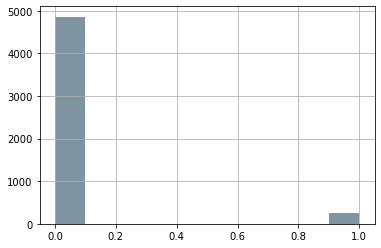

In [34]:
y.hist(color=['#7F94A1'])

### Handling with  Class Imbalance

In [35]:
ss = StandardScaler()

X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

In [36]:
#ratio = {1 : n_pos * 20, 0 : n_neg} 

smote = imblearn.over_sampling.SMOTE(sampling_strategy= 'minority', random_state = 42)

X_tr_smote_ss, y_tr_smote_ss = smote.fit_resample(X_train_std, y_train)
X_tr_smote, y_tr_smote = smote.fit_resample(X_train, y_train)
#X_te_smote, y_te_smote = smote.fit_resample(X_test_std, y_test)

lr_smote = LogisticRegression(solver='liblinear') 
lr_smote.fit(X_tr_smote, y_tr_smote)


print('Logistic Regression on SMOTE Train Data; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_tr_smote, lr_smote.predict(X_tr_smote)), roc_auc_score(y_tr_smote, lr_smote.predict_proba(X_tr_smote)[:,1])))


Logistic Regression on SMOTE Train Data; Test F1: 0.945, Test AUC: 0.987


<AxesSubplot:>

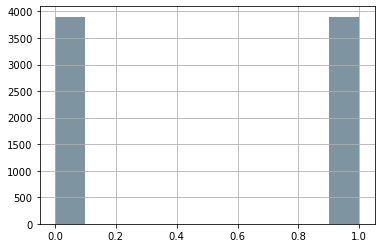

In [37]:
y_tr_smote.hist(color=['#7F94A1'])

### EXP0: Logistic Regression(baseline)

In [38]:
lr =LogisticRegression()
lr.fit(X_tr_smote_ss, y_tr_smote_ss)
print("Train Logistic Regression :",lr.score(X_tr_smote_ss, y_tr_smote_ss))
print('--------------------------------------')
model_eval(lr, X_test_std, y_test)

Train Logistic Regression : 0.8011538461538461
--------------------------------------
Accurcy : 0.7485322896281801
F(1): 0.2801120448179271
Precision : 0.1694915254237288
Recall : 0.8064516129032258


##### Pipeline ---->EXP0: Logistic Regression(baseline)

In [39]:
RUS=RandomUnderSampler(random_state= 42 )

pipeline = Pipeline([( "rus" , RUS), ( "lr" , lr)])

parameters = {
    'lr__penalty':['l1','l2'],
    "lr__C":[13,14,15,16]
  }

In [40]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'rus', 'lr', 'rus__random_state', 'rus__replacement', 'rus__sampling_strategy', 'lr__C', 'lr__class_weight', 'lr__dual', 'lr__fit_intercept', 'lr__intercept_scaling', 'lr__l1_ratio', 'lr__max_iter', 'lr__multi_class', 'lr__n_jobs', 'lr__penalty', 'lr__random_state', 'lr__solver', 'lr__tol', 'lr__verbose', 'lr__warm_start'])

In [41]:
from sklearn.metrics import make_scorer
custom = make_scorer(fbeta_score, beta=2)
grid_pipeline = RandomizedSearchCV(pipeline,parameters, scoring=custom,cv=10,n_jobs=-1)

In [42]:
grid_pipeline.fit(X_tr_smote_ss, y_tr_smote_ss)


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('rus',
                                              RandomUnderSampler(random_state=42)),
                                             ('lr', LogisticRegression())]),
                   n_jobs=-1,
                   param_distributions={'lr__C': [13, 14, 15, 16],
                                        'lr__penalty': ['l1', 'l2']},
                   scoring=make_scorer(fbeta_score, beta=2))

In [43]:
print("Best params: ", grid_pipeline.best_params_)
print("Best estimator: ", grid_pipeline.best_estimator_)
print("Best score: ", grid_pipeline.best_score_)

Best params:  {'lr__penalty': 'l2', 'lr__C': 13}
Best estimator:  Pipeline(steps=[('rus', RandomUnderSampler(random_state=42)),
                ('lr', LogisticRegression(C=13))])
Best score:  0.8368983901577616


In [44]:
pip_lr=grid_pipeline.best_estimator_

##### after Pipeline ---->EXP0: Logistic Regression(baseline)


In [45]:
model_eval(pip_lr,X_test_std, y_test)

Accurcy : 0.7485322896281801
F(1): 0.2801120448179271
Precision : 0.1694915254237288
Recall : 0.8064516129032258


### EXP1:Decision Tree

In [46]:
dt= DecisionTreeClassifier()
dt.fit(X_tr_smote, y_tr_smote)
print("Train Decision Tree: ",dt.score(X_tr_smote, y_tr_smote))
#print("Test Decision Tree: ",dt.score(X_te_smote, y_te_smote))
print('--------------------------------------')
model_eval(dt, X_test, y_test)

Train Decision Tree:  1.0
--------------------------------------
Accurcy : 0.9050880626223092
F(1): 0.19834710743801656
Precision : 0.2033898305084746
Recall : 0.1935483870967742


##### Pipeline ---->EXP1:Decision Tree

In [47]:
RUS=RandomUnderSampler(random_state= 42 )


In [48]:
pipeline = Pipeline([( "rus" , RUS), ( "dt" , dt)])

parameters = {
    'dt__max_depth':[3, 5, 7, 8, 11, 12],
    'dt__min_samples_leaf': [2, 3, 5, 9],
    'dt__criterion':['gini','entropy'],
   # 'dt__random_state':[60,100,1000,160]
  }

In [49]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'rus', 'dt', 'rus__random_state', 'rus__replacement', 'rus__sampling_strategy', 'dt__ccp_alpha', 'dt__class_weight', 'dt__criterion', 'dt__max_depth', 'dt__max_features', 'dt__max_leaf_nodes', 'dt__min_impurity_decrease', 'dt__min_impurity_split', 'dt__min_samples_leaf', 'dt__min_samples_split', 'dt__min_weight_fraction_leaf', 'dt__random_state', 'dt__splitter'])

In [50]:
from sklearn.metrics import make_scorer
custom = make_scorer(fbeta_score, beta=2)
grid_pipeline = RandomizedSearchCV(pipeline,parameters, scoring=custom)

In [51]:
# fit
grid_pipeline.fit(X_tr_smote, y_tr_smote)


RandomizedSearchCV(estimator=Pipeline(steps=[('rus',
                                              RandomUnderSampler(random_state=42)),
                                             ('dt', DecisionTreeClassifier())]),
                   param_distributions={'dt__criterion': ['gini', 'entropy'],
                                        'dt__max_depth': [3, 5, 7, 8, 11, 12],
                                        'dt__min_samples_leaf': [2, 3, 5, 9]},
                   scoring=make_scorer(fbeta_score, beta=2))

In [52]:
print("Best estimator: ", grid_pipeline.best_estimator_)


Best estimator:  Pipeline(steps=[('rus', RandomUnderSampler(random_state=42)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=11,
                                        min_samples_leaf=5))])


In [53]:
pip_dt=grid_pipeline.best_estimator_

In [54]:
print("Best params: ", grid_pipeline.best_params_)


Best params:  {'dt__min_samples_leaf': 5, 'dt__max_depth': 11, 'dt__criterion': 'entropy'}


##### after Pipeline ---->EXP1:Decision Tree


In [55]:
model_eval(pip_dt, X_test, y_test)

Accurcy : 0.898238747553816
F(1): 0.1746031746031746
Precision : 0.171875
Recall : 0.1774193548387097


### EXP2:Random Forest

In [56]:
rf = RandomForestClassifier()
rf.fit(X_tr_smote, y_tr_smote)
print("Train Random Forest: ",rf.score(X_tr_smote, y_tr_smote))
#print("Test RF Tree: ",rf.score(X_test, y_test))
print('--------------------------------------')
model_eval(dt, X_test, y_test)


Train Random Forest:  1.0
--------------------------------------
Accurcy : 0.9050880626223092
F(1): 0.19834710743801656
Precision : 0.2033898305084746
Recall : 0.1935483870967742


##### Pipeline ---->EXP2:Random Forest

In [57]:
RUS=RandomUnderSampler(random_state= 42)

pipeline = Pipeline([( "rus" , RUS), ( "rf" , rf)])

parameters = {
  
           "rf__n_estimators": [4, 40, 80, 20, 45], 
           'rf__max_depth': [i for i in range(10,100,10)],
           'rf__min_samples_split': [2, 5, 10, 15, 15.5, 50, 100],
          # 'rf__criterion': ['gini', 'entropy'],
           'rf__max_features': ['log2', 'sqrt','auto']
  }

In [58]:
from sklearn.metrics import make_scorer
custom = make_scorer(fbeta_score, beta=2)
grid_pipeline = RandomizedSearchCV(pipeline,parameters, scoring=custom,cv=10,n_jobs=-1)

In [59]:
grid_pipeline.fit(X_tr_smote, y_tr_smote)


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('rus',
                                              RandomUnderSampler(random_state=42)),
                                             ('rf', RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'rf__max_depth': [10, 20, 30, 40, 50,
                                                          60, 70, 80, 90],
                                        'rf__max_features': ['log2', 'sqrt',
                                                             'auto'],
                                        'rf__min_samples_split': [2, 5, 10, 15,
                                                                  15.5, 50,
                                                                  100],
                                        'rf__n_estimators': [4, 40, 80, 20,
                                                             45]},
                   scoring=make_scorer(fbeta_score, bet

In [60]:
print("Best params: ", grid_pipeline.best_params_)


Best params:  {'rf__n_estimators': 40, 'rf__min_samples_split': 2, 'rf__max_features': 'log2', 'rf__max_depth': 70}


In [61]:
print("Best estimator: ", grid_pipeline.best_estimator_)


Best estimator:  Pipeline(steps=[('rus', RandomUnderSampler(random_state=42)),
                ('rf',
                 RandomForestClassifier(max_depth=70, max_features='log2',
                                        n_estimators=40))])


In [62]:
pip_rf=grid_pipeline.best_estimator_

In [63]:
model_eval(pip_rf, X_test, y_test)

Accurcy : 0.9383561643835616
F(1): 0.136986301369863
Precision : 0.45454545454545453
Recall : 0.08064516129032258


### EXP3:Knn

In [64]:
knn = neighbors.KNeighborsClassifier()
knn.fit(X_tr_smote, y_tr_smote)
print("Train KNN Tree: ",knn.score(X_tr_smote, y_tr_smote))
print('--------------------------------------')
model_eval(knn, X_train, y_train)

Train KNN Tree:  0.9271794871794872
--------------------------------------
Accurcy : 0.8695864937607046
F(1): 0.41234840132304307
Precision : 0.25972222222222224
Recall : 1.0


##### Pipeline ----> EXP3:Knn

In [65]:
RUS=RandomUnderSampler(random_state= 42 )

pipeline = Pipeline([( "rus" , RUS), ( "knn" , knn)])

parameters = {
  'knn__n_neighbors':[5,7,8,10],
  'knn__metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

  }

In [66]:
from sklearn.metrics import make_scorer
custom = make_scorer(fbeta_score, beta=2)
grid_pipeline = RandomizedSearchCV(pipeline,parameters, scoring=custom,cv=10,n_jobs=-1)

In [67]:
grid_pipeline.fit(X_tr_smote, y_tr_smote)


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('rus',
                                              RandomUnderSampler(random_state=42)),
                                             ('knn', KNeighborsClassifier())]),
                   n_jobs=-1,
                   param_distributions={'knn__metric': ['euclidean',
                                                        'manhattan',
                                                        'chebyshev',
                                                        'minkowski'],
                                        'knn__n_neighbors': [5, 7, 8, 10]},
                   scoring=make_scorer(fbeta_score, beta=2))

In [68]:
print("Best estimator: ", grid_pipeline.best_estimator_)


Best estimator:  Pipeline(steps=[('rus', RandomUnderSampler(random_state=42)),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=7))])


In [69]:
pip_knn=grid_pipeline.best_estimator_

In [70]:
model_eval(pip_knn, X_test, y_test)

Accurcy : 0.7827788649706457
F(1): 0.25503355704697983
Precision : 0.16101694915254236
Recall : 0.6129032258064516


### EXP4:XGboost 

In [71]:
import xgboost as xgb
gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        
                       )

eval_set=[(X_tr_smote, y_tr_smote),(X_test, y_test)]
fit_model = gbm.fit( 
                    X_tr_smote, y_tr_smote, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )

accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit))

0.9315068493150684

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

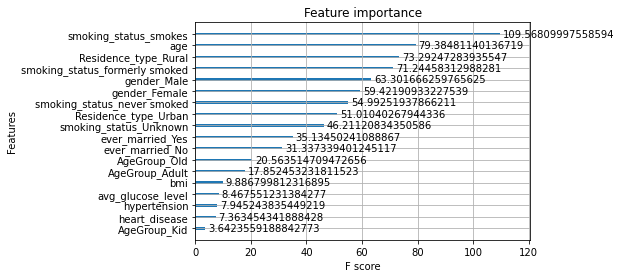

In [72]:
xgb.plot_importance(gbm, importance_type='gain')

In [73]:
model_eval(gbm, X_test, y_test)

Accurcy : 0.9315068493150684
F(1): 0.05405405405405405
Precision : 0.16666666666666666
Recall : 0.03225806451612903


##### Pipeline ---->EXP4:XGboost 


In [74]:

#learning_rate=0.02, n_estimators=600, objective='binary:logistic'
pipeline = Pipeline([( "rus" , RUS), ( "gbm" , gbm)])

params = {
         'gbm__n_estimators':[600,400,300,100],
        'gbm__objective':['binary:logistic'],
         'gbm__learning_rate':[0.02,0.04,0.05,1],
         'gbm__min_child_weight': [1, 5, 10],
        'gbm__gamma': [0.5, 1, 1.5, 2, 5],
        'gbm__subsample': [0.6, 0.8, 1.0],
        'gbm__colsample_bytree': [0.6, 0.8, 1.0],
        'gbm__max_depth': [3, 4, 5]
        }

In [75]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'rus', 'gbm', 'rus__random_state', 'rus__replacement', 'rus__sampling_strategy', 'gbm__objective', 'gbm__use_label_encoder', 'gbm__base_score', 'gbm__booster', 'gbm__colsample_bylevel', 'gbm__colsample_bynode', 'gbm__colsample_bytree', 'gbm__enable_categorical', 'gbm__gamma', 'gbm__gpu_id', 'gbm__importance_type', 'gbm__interaction_constraints', 'gbm__learning_rate', 'gbm__max_delta_step', 'gbm__max_depth', 'gbm__min_child_weight', 'gbm__missing', 'gbm__monotone_constraints', 'gbm__n_estimators', 'gbm__n_jobs', 'gbm__num_parallel_tree', 'gbm__predictor', 'gbm__random_state', 'gbm__reg_alpha', 'gbm__reg_lambda', 'gbm__scale_pos_weight', 'gbm__subsample', 'gbm__tree_method', 'gbm__validate_parameters', 'gbm__verbosity'])

In [76]:
from sklearn.metrics import make_scorer
custom = make_scorer(fbeta_score, beta=2)
grid_pipeline = RandomizedSearchCV(pipeline,params, scoring=custom,cv=10,n_jobs=-1)

In [77]:
grid_pipeline.fit(X_tr_smote, y_tr_smote)


[10:25:21] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('rus',
                                              RandomUnderSampler(random_state=42)),
                                             ('gbm',
                                              XGBClassifier(base_score=0.5,
                                                            booster='gbtree',
                                                            colsample_bylevel=1,
                                                            colsample_bynode=1,
                                                            colsample_bytree=1,
                                                            enable_categorical=False,
                                                            gamma=0, gpu_id=-1,
                                                            importance_type=None,
                                                            interaction_constraints='',
                                                     

In [78]:
print("Best estimator: ", grid_pipeline.best_params_)


Best estimator:  {'gbm__subsample': 0.8, 'gbm__objective': 'binary:logistic', 'gbm__n_estimators': 100, 'gbm__min_child_weight': 1, 'gbm__max_depth': 5, 'gbm__learning_rate': 1, 'gbm__gamma': 1.5, 'gbm__colsample_bytree': 0.8}


In [79]:
pip_xgbs=grid_pipeline.best_estimator_

In [80]:
model_eval(pip_xgbs, X_test, y_test)

Accurcy : 0.9285714285714286
F(1): 0.1978021978021978
Precision : 0.3103448275862069
Recall : 0.14516129032258066


In [81]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'rus', 'gbm', 'rus__random_state', 'rus__replacement', 'rus__sampling_strategy', 'gbm__objective', 'gbm__use_label_encoder', 'gbm__base_score', 'gbm__booster', 'gbm__colsample_bylevel', 'gbm__colsample_bynode', 'gbm__colsample_bytree', 'gbm__enable_categorical', 'gbm__gamma', 'gbm__gpu_id', 'gbm__importance_type', 'gbm__interaction_constraints', 'gbm__learning_rate', 'gbm__max_delta_step', 'gbm__max_depth', 'gbm__min_child_weight', 'gbm__missing', 'gbm__monotone_constraints', 'gbm__n_estimators', 'gbm__n_jobs', 'gbm__num_parallel_tree', 'gbm__predictor', 'gbm__random_state', 'gbm__reg_alpha', 'gbm__reg_lambda', 'gbm__scale_pos_weight', 'gbm__subsample', 'gbm__tree_method', 'gbm__validate_parameters', 'gbm__verbosity'])

## Voting


In [82]:
model_names = ["pip_lr","pip_dt","pip_rf","pip_knn","pip_xgbs"]
model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names,model_vars))

In [83]:
# Get peek at individual test scores

print(f' Log-reg Test score: {pip_lr.score(X_test_std, y_test)}')
print(f' Decision Tree Test score: {pip_dt.score(X_test, y_test)}')
print(f' Random forest Test score: {pip_rf.score(X_test, y_test)}')
print(f' KNN  Test score: {pip_knn.score(X_test, y_test)}')
print(f' XGboost Test score: {pip_xgbs.score(X_test, y_test)}')


 Log-reg Test score: 0.7485322896281801
 Decision Tree Test score: 0.898238747553816
 Random forest Test score: 0.9383561643835616
 KNN  Test score: 0.7827788649706457
 XGboost Test score: 0.9285714285714286


In [84]:
# create voting classifier
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='soft', #<-- sklearn calls this soft voting
                                    n_jobs=-1)
voting_classifer.fit(X_tr_smote, y_tr_smote)

VotingClassifier(estimators=[('pip_lr',
                              Pipeline(steps=[('rus',
                                               RandomUnderSampler(random_state=42)),
                                              ('lr',
                                               LogisticRegression(C=13))])),
                             ('pip_dt',
                              Pipeline(steps=[('rus',
                                               RandomUnderSampler(random_state=42)),
                                              ('dt',
                                               DecisionTreeClassifier(criterion='entropy',
                                                                      max_depth=11,
                                                                      min_samples_leaf=5))])),
                             ('pip_rf',
                              Pipeline(steps=[('rus',
                                               RandomUnderSampler(random_s...
                 

In [85]:
# Get accuracy (model to beat: RF with 0.8136 accuracy)
y_pred = voting_classifer.predict(X_test)
accuracy_score(y_test, y_pred)

0.9197651663405088

## Stacking


In [86]:
stacked = StackingClassifier(
    classifiers=model_vars, meta_classifier=LogisticRegression(), use_probas=False)


In [87]:
stacked.fit(X_tr_smote, y_tr_smote)

[10:25:25] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(classifiers=[Pipeline(steps=[('rus',
                                                 RandomUnderSampler(random_state=42)),
                                                ('lr',
                                                 LogisticRegression(C=13))]),
                                Pipeline(steps=[('rus',
                                                 RandomUnderSampler(random_state=42)),
                                                ('dt',
                                                 DecisionTreeClassifier(criterion='entropy',
                                                                        max_depth=11,
                                                                        min_samples_leaf=5))]),
                                Pipeline(steps=[('rus',
                                                 RandomUnderSampler(random_state=42)),
                                                ('rf',
                                                 Rand

In [88]:
y_pred = stacked.predict(X_test)
accuracy_score(y_test, y_pred)

0.9324853228962818

## ROC curve


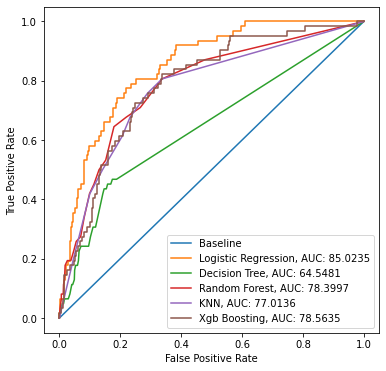

In [112]:
from sklearn.metrics import roc_curve
fig, ax = plt.subplots(figsize=(6,6))
#pip_lr","pip_dt","pip_rf","pip_knn","pip_xgbs"

# Logistic 
ypred_prob1 = pip_lr.predict_proba(X_test_std)
classlog_probs = ypred_prob1[:, 1]

# tree
ypred_prob2 = pip_dt.predict_proba(X_test)
classtree_probs = ypred_prob2[:, 1]

# rf
ypred_prob3 = pip_rf.predict_proba(X_test)
classrf_probs = ypred_prob3[:, 1]

# KNN 
ypred_prob4 = pip_knn.predict_proba(X_test)
classKNN_probs = ypred_prob4[:, 1]


# xgboost
ypred_prob5 = pip_xgbs.predict_proba(X_test)
classgb_probs = ypred_prob5[:, 1]

# plot baseline roc curve
plt.plot([0, 1], [0, 1], linestyle='-', label='Baseline')
# calculate roc curve for model
fpr1, tpr1, _ = roc_curve(y_test,classlog_probs)
fpr2, tpr2, _ = roc_curve(y_test,classtree_probs )
fpr3, tpr3, _ = roc_curve(y_test, classrf_probs)
fpr4, tpr4, _ = roc_curve(y_test, classKNN_probs)
fpr6, tpr6, _ = roc_curve(y_test, classgb_probs)

auc1 = round(100*(roc_auc_score(y_test,classlog_probs)), 4)
auc2 = round(100*(roc_auc_score(y_test,classtree_probs )), 4)
auc3 = round(100*(roc_auc_score(y_test, classrf_probs)), 4)
auc4 = round(100*(roc_auc_score(y_test, classKNN_probs)), 4)
auc6 = round(100*(roc_auc_score(y_test, classgb_probs)), 4)


# plot model roc curve
plt.plot(fpr1, tpr1, linestyle='-', label=f'Logistic Regression, AUC: {auc1}')
plt.plot(fpr2, tpr2, linestyle='-', label=f'Decision Tree, AUC: {auc2}')
plt.plot(fpr3, tpr3, linestyle='-', label=f'Random Forest, AUC: {auc3}')
plt.plot(fpr4, tpr4, linestyle='-', label=f'KNN, AUC: {auc4}')
plt.plot(fpr6, tpr6, linestyle='-', label=f'Xgb Boosting, AUC: {auc6}')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Best threshold

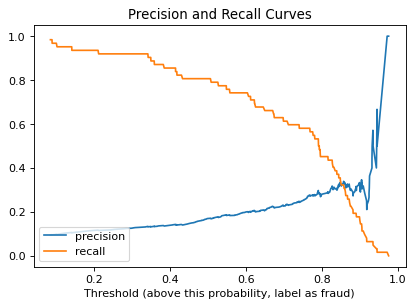

In [101]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, pip_lr.predict_proba(X_test_std)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

In [107]:
y_predict = (pip_lr.predict_proba(X_test_std)[:,1] > 0.3) #[:,1] اعطيني كولوم 1
print("Threshold of 0.3:")
print("Precision: {:6.4f},   Recall: {:6.4f},   fbeat: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                              recall_score(y_test, y_predict),
                                                              fbeta_score(y_test, y_predict,beta=2)))

Threshold of 0.3:
Precision: 0.1258,   Recall: 0.9194,   fbeat: 0.4066


## Confusion Metrics

In [103]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test_std)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.PuBu, annot=True, square=True, fmt='d',
                   xticklabels=['not stroke', ' stroke'],
                   yticklabels=['not stroke', 'stroke']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

In [104]:
y_test.value_counts()

0    960
1     62
Name: stroke, dtype: int64

In [105]:
from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(pip_lr, threshold), threshold=(0.0,1.0,0.02))
#best is 0.30

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [109]:
pip_lr.score(X_test_std,y_test)

0.7485322896281801